## LAB 1: Keyword analysis of Trip Advisory hotel reviews

Objectives:
- Setup EC2 instance running
- Filter texts by language
- Simple text normalization and tokenization
- Word frequencies with pandas
- Calculate PMI and G2
- Generate word clouds
- Input basic models (all our notebooks will start with this)

### Part 2 - Data Preparation

In [1]:
import pandas as pd
import numpy as np
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

Read in data from JSON file stored in an Amazon S3 bucket

In [2]:
df = pd.read_json('s3://ling583/review.json.gz', lines=True, storage_options={'anon':True})

In [3]:
import pycld2

def guess_lang(text):
    try:
        reliable, _, langs = pycld2.detect(text, isPlainText=True, hintLanguage='en')
        if reliable:
            return langs[0][0]
    except pycld2.error as e:
        pass
    return np.NaN

In [4]:
df['lang'] = df['text'].progress_apply(guess_lang)

  0%|          | 0/878561 [00:00<?, ?it/s]

In [5]:
df['lang'].value_counts()

ENGLISH        771175
GERMAN          26879
FRENCH          24588
ITALIAN         19968
SPANISH         14044
Japanese         6009
PORTUGUESE       4436
DUTCH            3210
SWEDISH          2943
DANISH           1616
NORWEGIAN        1304
Chinese           524
RUSSIAN           271
TURKISH           110
POLISH             50
ChineseT           27
NORWEGIAN_N        21
GREEK              20
Korean             17
THAI               15
INDONESIAN          4
OCCITAN             3
CORSICAN            2
GALICIAN            1
ARABIC              1
AFRIKAANS           1
CATALAN             1
AFAR                1
HUNGARIAN           1
Name: lang, dtype: int64

Isolate the views are that are just in English

In [6]:
df = df[df['lang']=='ENGLISH'].reset_index()

Normalize database: add top level columns for nested data

In [7]:
df['ratings'].head()

0    {'service': 5.0, 'cleanliness': 5.0, 'overall'...
1    {'service': 5.0, 'cleanliness': 5.0, 'overall'...
2    {'service': 4.0, 'cleanliness': 5.0, 'overall'...
3    {'service': 5.0, 'cleanliness': 5.0, 'overall'...
4    {'service': 4.0, 'cleanliness': 5.0, 'overall'...
Name: ratings, dtype: object

In [8]:
pd.json_normalize(df['ratings'].head())

,service,cleanliness,overall,value,location,sleep_quality,rooms
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,4.0,5.0,4.0,4.0,5.0,4.0,4.0
3,5.0,5.0,4.0,5.0,5.0,5.0,5.0
4,4.0,5.0,4.0,3.0,5.0,5.0,5.0


In [9]:
pd.concat([df, pd.json_normalize(df['ratings'])], axis=1)

,index,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,...,lang,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,...,ENGLISH,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,...,ENGLISH,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2,2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,...,ENGLISH,4.0,5.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN
3,3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,...,ENGLISH,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN
4,4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,...,ENGLISH,4.0,5.0,4.0,3.0,5.0,5.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771170,878464,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“had a great stay!”,We just returned from the Hotel Palomar. We we...,"{'username': 'sejdd', 'num_cities': 3, 'num_he...",August 2006,84093,0,2006-08-29,5725903,...,ENGLISH,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0
771171,878465,"{'service': 1.0, 'cleanliness': 3.0, 'overall'...",“Not quite there yet”,My husband and I just returned home from a wee...,"{'username': 'EmilieD', 'num_reviews': 1, 'id'...",July 2006,84093,4,2006-08-27,5714840,...,ENGLISH,1.0,3.0,2.0,2.0,4.0,NaN,2.0,1.0,3.0
771172,878466,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Almost there!!! But Great Staff and Location!”,We stay at many Kimpton properties scattered a...,"{'username': 'mgkanther', 'num_cities': 2, 'nu...",August 2006,84093,0,2006-08-21,5689612,...,ENGLISH,5.0,5.0,4.0,4.0,5.0,NaN,5.0,4.0,5.0
771173,878467,"{'service': 3.0, 'cleanliness': 3.0, 'overall'...",“extremely disappointed”,Stayed at Palomar for three nights at the end ...,"{'username': 'ChristieD.', 'num_reviews': 1, '...",July 2006,84093,4,2006-07-24,5502304,...,ENGLISH,3.0,3.0,2.0,2.0,5.0,NaN,4.0,3.0,2.0


In [10]:
df = pd.concat([df, pd.json_normalize(df['ratings'])], axis=1)

In [11]:
df['overall'].value_counts()

5.0    316641
4.0    247575
3.0    103742
2.0     53401
1.0     49815
0.0         1
Name: overall, dtype: int64

In [12]:
df[df['overall']==0.0]

,index,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,...,lang,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
526911,618026,{'overall': 0.0},"“Perfect Location, large room - stayed for two...",Best location. Right where Pier 39 is. Lots of...,"{'username': 'Christine M', 'num_cities': 4, '...",NaN,81222,1,2012-02-28,125344661,...,ENGLISH,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Keyword analysis

In [13]:
df = df[df['overall']>0]

In [14]:
len(df)

771174

In [15]:
import re
from collections import Counter

Normalize, tokenize, and count tokens.  Converts punctuation until a blank space.

In [16]:
def tokenize(text):
    return re.sub(r'[^a-z]+', ' ', text.lower()).split()

def termf(texts):  #count and termf is the same thing
    return Counter(concat(map(tokenize, tqdm(texts))))

In [17]:
def count (texts):
   return Counter(concat(map(tokenize, tqdm(texts))))

In [18]:
count(df['text'][:10])

  0%|          | 0/10 [00:00<?, ?it/s]

Counter({'stayed': 7,
         'in': 33,
         'a': 49,
         'king': 1,
         'suite': 10,
         'for': 25,
         'nights': 3,
         'and': 52,
         'yes': 1,
         'it': 20,
         'cots': 1,
         'us': 3,
         'bit': 1,
         'but': 9,
         'we': 26,
         'were': 15,
         'happy': 4,
         'with': 32,
         'the': 112,
         'standard': 1,
         'of': 26,
         'room': 15,
         'location': 6,
         'friendliness': 1,
         'staff': 5,
         'our': 17,
         'was': 26,
         'on': 7,
         'th': 4,
         'floor': 3,
         'overlooking': 1,
         'broadway': 1,
         'madhouse': 1,
         'fairway': 3,
         'market': 1,
         'quite': 2,
         'no': 6,
         'noise': 1,
         'evident': 1,
         'from': 8,
         'hallway': 1,
         'or': 4,
         'adjoining': 1,
         'rooms': 11,
         'great': 11,
         'to': 39,
         'be': 5,
         'able':

In [19]:
f = pd.DataFrame()
f['all'] = pd.Series(termf(df['text']))

  0%|          | 0/771174 [00:00<?, ?it/s]

In [20]:
f.head()

,all
stayed,332634
in,1990577
a,3466481
king,52407
suite,78901


Same, but just for one-star reviews

In [21]:
f['all'].sort_values(ascending=False)

the            7835500
and            4215505
a              3466481
to             3066720
was            2605620
                ...   
attory               1
quarrell             1
supermarkts          1
chipoltees           1
humidiifer           1
Name: all, Length: 194454, dtype: int64

In [22]:
f['bad'] = pd.Series(termf(df[df['overall']==1.0]['text'])).fillna(0)

  0%|          | 0/49815 [00:00<?, ?it/s]

In [23]:
f.head()

,all,bad
stayed,332634,19737.0
in,1990577,164529.0
a,3466481,237214.0
king,52407,2974.0
suite,78901,3774.0


In [24]:
import llr
from math import log2

In [25]:
# Total all, Total bad
N_all = f['all'].sum()
N_bad = f['bad'].sum()
N_all, N_bad

(119584444, 9821109.0)

Calculate and apply keyness metrics

In [26]:
def G2(f12, f1, f2, N):
    return llr.llr_root(f12, f1-f12, f2-f12, N-f1-f2+f12)

def pmi(f12, f1, f2, N):
    return log2(f12) + log2(N) - log2(f1) - log2(f2)

In [27]:
f['bad_G2'] = f.progress_apply(lambda r: G2(r['bad'], r['all'], N_bad, N_all), axis=1)
f['bad_pmi'] = f.progress_apply(lambda r: pmi(r['bad'], r['all'], N_bad, N_all), axis=1)

  0%|          | 0/194454 [00:00<?, ?it/s]

  0%|          | 0/194454 [00:00<?, ?it/s]

In [28]:
f.sort_values(ascending=False, by='bad_pmi').head(10)

,all,bad,bad_G2,bad_pmi
unemcumbered,1,1.0,2.235839,3.606
decription,2,2.0,3.161954,3.606
eavedropping,1,1.0,2.235839,3.606
ians,1,1.0,2.235839,3.606
fisting,1,1.0,2.235839,3.606
beamce,1,1.0,2.235839,3.606
petrina,1,1.0,2.235839,3.606
conntinually,1,1.0,2.235839,3.606
horrorshow,1,1.0,2.235839,3.606
dalliances,1,1.0,2.235839,3.606


From above, an example of pmi overexaggerating negative reviews.  Lets filter for above 500.

In [29]:
f[f['all']>500].sort_values(ascending=False, by='bad_pmi').head(10)

,all,bad,bad_G2,bad_pmi
filth,561,384.0,35.361845,3.059106
infested,654,447.0,38.125672,3.056984
refund,5287,3408.0,102.365867,2.972476
dump,3099,1911.0,75.040519,2.908525
filthy,6223,3830.0,106.138496,2.905734
disgusted,883,540.0,39.730154,2.896546
roaches,1261,770.0,47.408245,2.894362
disgusting,5064,3088.0,94.880429,2.892395
stole,527,309.0,29.449462,2.835804
burns,779,455.0,35.669232,2.830243


In [30]:
f.sort_values(ascending=False, by='bad_G2').head(10)

,all,bad,bad_G2,bad_pmi
told,79798,22745.0,167.713459,1.795197
i,2179220,247532.0,162.306308,0.467875
dirty,28117,12111.0,157.668814,2.390875
they,543213,77111.0,147.247801,0.789491
he,105469,23554.0,140.655548,1.443225
manager,48044,14311.0,137.154546,1.858768
worst,16613,7995.0,135.799940,2.550857
that,901573,110820.0,132.796371,0.581774
me,238409,39269.0,130.955681,1.004024
not,733283,92785.0,129.636693,0.623593


In [31]:
f[f['all']>500].sort_values(ascending=False, by='bad_G2').head(10)

,all,bad,bad_G2,bad_pmi
told,79798,22745.0,167.713459,1.795197
i,2179220,247532.0,162.306308,0.467875
dirty,28117,12111.0,157.668814,2.390875
they,543213,77111.0,147.247801,0.789491
he,105469,23554.0,140.655548,1.443225
manager,48044,14311.0,137.154546,1.858768
worst,16613,7995.0,135.799940,2.550857
that,901573,110820.0,132.796371,0.581774
me,238409,39269.0,130.955681,1.004024
not,733283,92785.0,129.636693,0.623593


Generate word clouds

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
def cloud(freqs, k=200):
    plt.figure(figsize=(10,10))
    items = dict(freqs.sort_values(ascending=False).head(k))
    wc = WordCloud(width=1000,
                  height=1000,
                  background_color='white').generate_from_frequencies(items)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

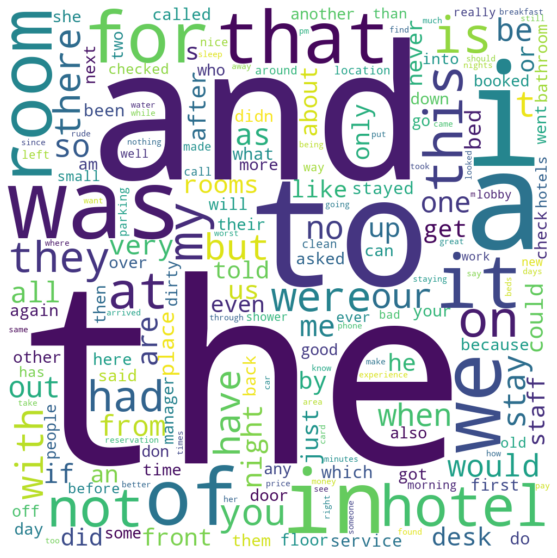

In [34]:
cloud(f['bad'])

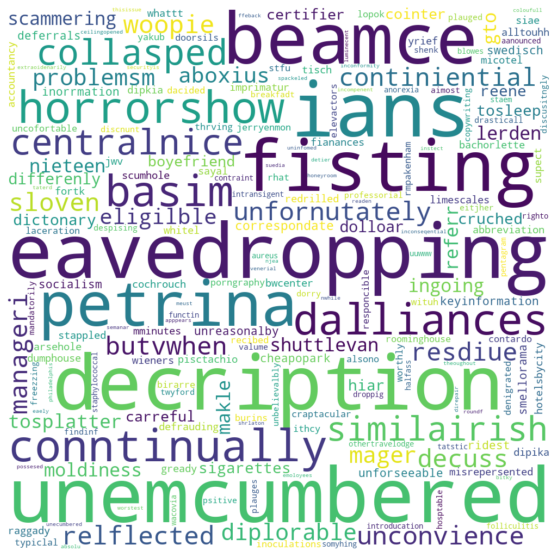

In [35]:
cloud(f['bad_pmi'])

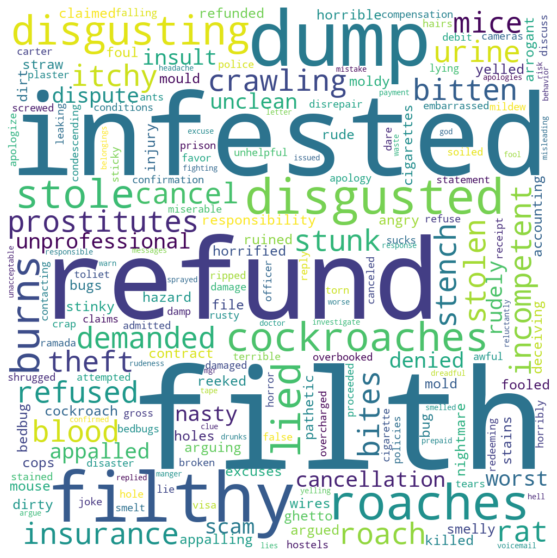

In [36]:
cloud(f['bad_pmi'][f['all']>500])

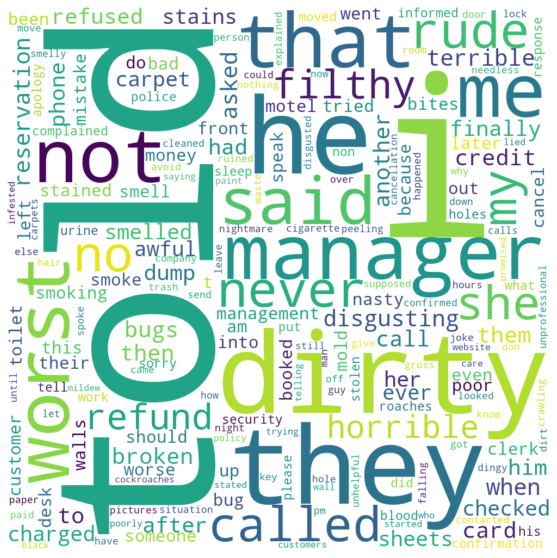

In [37]:
cloud(f['bad_G2'])

Look more closely at some of the reviews

In [38]:
from kwic import kwic

In [39]:
kwic('told', df[df['overall']==1.0]['text'])

29,vailable and the person I had spoken to was not on duty at the time. I was,told,to check again later and I responded that if no other room was available I
29,"ew minutes, went back down and said I would check out. At that point I was",told,that since it was by then past noon I was to pay for the room anyway! Upon
75,"ooking we were advised that ALL ROOMS have a bathtub - ""no sorry, you were",told,"wrong, and there's nothing I can do but you are welcome to leave"". Then my"
228,morning. He/she was not in so we talked to the front desk person. When we,told,"her about the condom wrapper she said ""eeeeggghhhhhh"" and said that ""she h"
228,"and said that ""she has no idea what is up with the cleaning staff lately""",told,us that she would tell the manager. We never heard anything from the manag
376,leave early because of illness. Even though we went to the front desk and,told,them we were leaving the staff didn’t check us out of our room. A few week
376,er we called SPG to get the points for our unused nights refunded and were,told,we couldn’t because the hotel was claiming we stayed the entire 4 nights.
420,"lax in the room. When I called the front desk and asked to be moved, I was",told,"that as I had booked thru Priceline, a move would be considered an up char"
555,or my wedding in Houston. The guy said yes to our weekend and then when we,told,him there was an event in Houston he said that he would have to honor the
669,he tiles and mold in the air filters. I contacted management again and was,told,there was nothing they could do about the noise!! and offered me free dinn


In [40]:
kwic(r'fisting', df['text'])

330573,en standing outside of the hotel were people drinking and smoking. Talking,fisting,"drinks in one hand smoking with the other---just tacky! No bell hop, at fi"


In [41]:
df.loc[330573]['text']

"We attempted to stay at the Renaissance in philly for a quick weekend trip to visit family and friends. We drove up from the DC area late on Friday. We were super tired as it was after 1a.m. when we arrived. We selected this hotel on the strength of the trip advisor reviews; so that's why it's important that I write an honest review. Please note that we were traveling with our 7month old.\nI knew there were issues when standing outside of the hotel were people drinking and smoking. Talking fisting drinks in one hand smoking with the other---just tacky! No bell hop, at first no one at the front desk.\nThe hotel is very old and in need of a serious renovation. So once in our room I prepared to get the baby to bed first and transfer him to the bed. I always check the sheets and mattresses for concerns about cleanliness and signs of bed bugs. The sheets had hairs and were stained up. Very nasty I took pictures. My husband called the front desk and they transferred us to a new room suppose

In [42]:
kwic(r'told', df[df['overall']==1.0]['text'])

29,vailable and the person I had spoken to was not on duty at the time. I was,told,to check again later and I responded that if no other room was available I
29,"ew minutes, went back down and said I would check out. At that point I was",told,that since it was by then past noon I was to pay for the room anyway! Upon
75,"ooking we were advised that ALL ROOMS have a bathtub - ""no sorry, you were",told,"wrong, and there's nothing I can do but you are welcome to leave"". Then my"
228,morning. He/she was not in so we talked to the front desk person. When we,told,"her about the condom wrapper she said ""eeeeggghhhhhh"" and said that ""she h"
228,"and said that ""she has no idea what is up with the cleaning staff lately""",told,us that she would tell the manager. We never heard anything from the manag
376,leave early because of illness. Even though we went to the front desk and,told,them we were leaving the staff didn’t check us out of our room. A few week
376,er we called SPG to get the points for our unused nights refunded and were,told,we couldn’t because the hotel was claiming we stayed the entire 4 nights.
420,"lax in the room. When I called the front desk and asked to be moved, I was",told,"that as I had booked thru Priceline, a move would be considered an up char"
555,or my wedding in Houston. The guy said yes to our weekend and then when we,told,him there was an event in Houston he said that he would have to honor the
669,he tiles and mold in the air filters. I contacted management again and was,told,there was nothing they could do about the noise!! and offered me free dinn


Let's look at good reviews

In [43]:
f = pd.DataFrame()
f['all'] = pd.Series(termf(df['text']))

  0%|          | 0/771174 [00:00<?, ?it/s]

In [44]:
f['good'] = pd.Series(termf(df[df['overall']==5.0]['text'])).fillna(0)

  0%|          | 0/316641 [00:00<?, ?it/s]

In [45]:
f.head()

,all,good
stayed,332634,135802.0
in,1990577,709413.0
a,3466481,1238245.0
king,52407,19648.0
suite,78901,37511.0


In [46]:
# Total all, Total good
N_good = f['good'].sum()
N_all, N_good

(119584444, 42830275.0)

In [47]:
f['good_G2'] = f.progress_apply(lambda r: G2(r['good'], r['all'], N_good, N_all), axis=1)
f['good_pmi'] = f.progress_apply(lambda r: pmi(r['good'], r['all'], N_good, N_all), axis=1)

  0%|          | 0/194454 [00:00<?, ?it/s]

  0%|          | 0/194454 [00:00<?, ?it/s]

In [48]:
f.sort_values(ascending=False, by='good_pmi').head(10)

,all,good,good_G2,good_pmi
charactersmmmmmmmmmmmmmmmmmmm,1,1.0,1.433023,1.481327
torquoise,2,2.0,2.026601,1.481327
alwaysvservice,1,1.0,1.433023,1.481327
sophistacated,1,1.0,1.433023,1.481327
shinned,3,3.0,2.482069,1.481327
patronzing,1,1.0,1.433023,1.481327
werte,2,2.0,2.026601,1.481327
arttended,1,1.0,1.433023,1.481327
statioenry,1,1.0,1.433023,1.481327
complcated,1,1.0,1.433023,1.481327


In [49]:
f[f['all']>500].sort_values(ascending=False, by='good_pmi').head(10)

,all,good,good_G2,good_pmi
royalty,1805,1586.0,46.011450,1.294721
drisco,713,604.0,26.966037,1.241973
commonwealth,1093,915.0,32.641521,1.224877
elysian,507,424.0,22.188009,1.223405
casablanca,2066,1680.0,42.454082,1.182948
surpassed,686,553.0,24.058731,1.170398
distrikt,1072,862.0,29.930874,1.166782
unforgettable,611,490.0,22.481131,1.162936
elysee,1041,823.0,28.547731,1.142321
impeccable,4042,3135.0,54.206327,1.114723


In [50]:
f.sort_values(ascending=False, by='good_G2').head(10)

,all,good,good_G2,good_pmi
great,531424,270066.0,223.697364,0.504776
and,4215505,1697401.0,192.454531,0.168949
wonderful,81070,55200.0,186.526909,0.926827
staff,491753,235032.0,172.303089,0.416250
perfect,78355,49263.0,153.651495,0.811806
highly,41914,29877.0,147.555910,0.992930
loved,62401,40257.0,145.421833,0.848997
amazing,49874,33796.0,144.788064,0.919891
excellent,118243,66200.0,141.063181,0.644475
beautiful,65830,40507.0,133.885123,0.780753


In [51]:
f[f['all']>500].sort_values(ascending=False, by='good_G2').head(10)

,all,good,good_G2,good_pmi
great,531424,270066.0,223.697364,0.504776
and,4215505,1697401.0,192.454531,0.168949
wonderful,81070,55200.0,186.526909,0.926827
staff,491753,235032.0,172.303089,0.416250
perfect,78355,49263.0,153.651495,0.811806
highly,41914,29877.0,147.555910,0.992930
loved,62401,40257.0,145.421833,0.848997
amazing,49874,33796.0,144.788064,0.919891
excellent,118243,66200.0,141.063181,0.644475
beautiful,65830,40507.0,133.885123,0.780753


In [52]:
def cloud(freqs, k=200):
    plt.figure(figsize=(10,10))
    items = dict(freqs.sort_values(ascending=False).head(k))
    wc = WordCloud(width=1000,
                  height=1000,
                  background_color='white').generate_from_frequencies(items)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

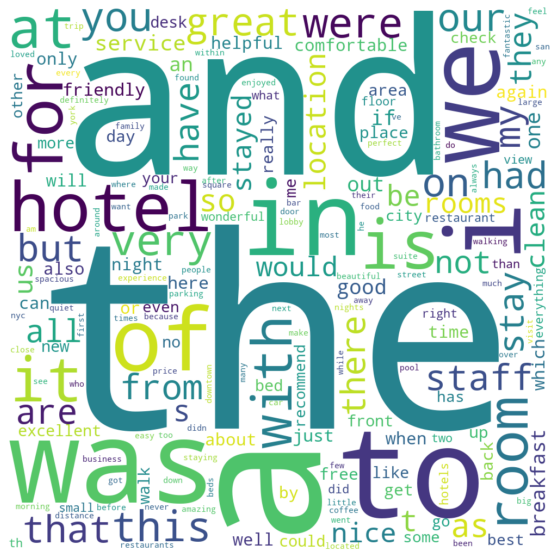

In [53]:
cloud(f['good'])

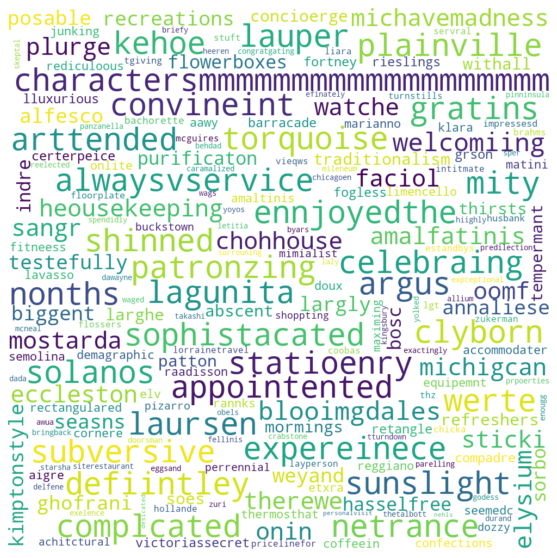

In [54]:
cloud(f['good_pmi'])

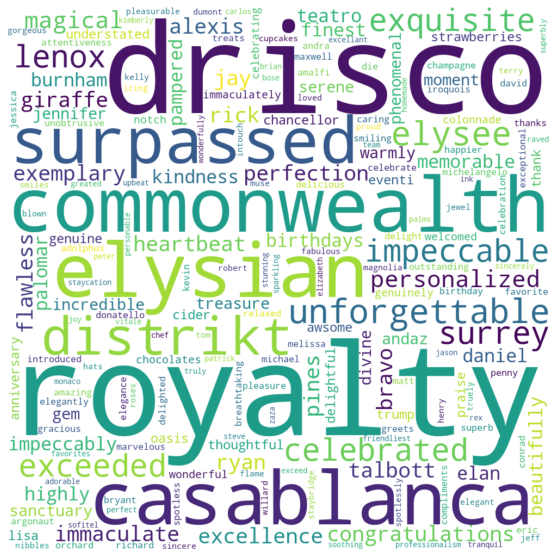

In [55]:
cloud(f['good_pmi'][f['all']>500])

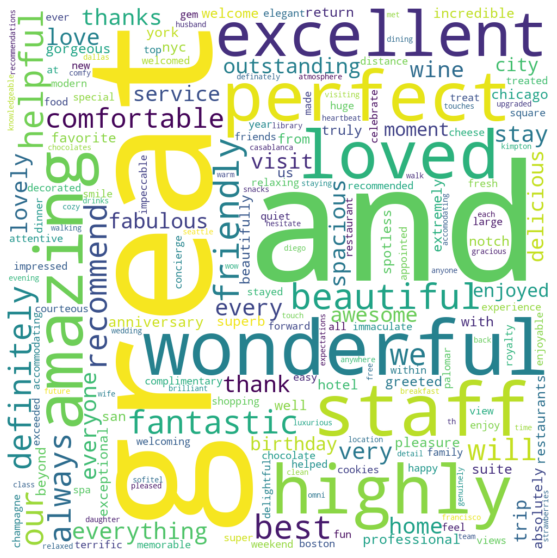

In [56]:
cloud(f['good_G2'])

In [57]:
kwic(r'royalty', df[df['overall']==5.0]['text'])

33,ommodating. Everyone at the front desk was superb and we were treated like,royalty,". Service aside our room had very large windows, a rain shower, and was in"
246,ttentiveness that went above and beyond my satisfaction. I truly felt like,royalty,. When I come to Houston I will always stay at Four Seasons. The rooms are
574,em to come back and pick me up - they did so quickly. We were treated like,royalty,. The hotel is close to just about everything you could need - I hated to l
704,"butler is second to no one, pressed all our clothes and made us feel like",royalty,....he is one of a kind. Concierge was very helpful and doorman were on top
843,"los because, as a whole, nothing can beat it. All personnel treat you like",royalty,and the rooms are beyond clean (I am a germaphobe) and updated. The contin
912,red ( from desk to valet to room service) treated me as if I were visiting,royalty,". They were invariably friendly, extremely helpful, and very very efficient"
1315,will spend anytime in it. This hotel is such a shining star! You feel like,royalty,", but somehow, the Sherry team never displays that stuffy attitude that I h"
1348,"y), and the people that work there were unbelievable. They treated us like",royalty,". If you are in NYC and want a perfect place to stay, STAY HERE!!!!!"
1580,nd they even walk around the desk to come give you your key. You feel like,royalty,"with the service. We usually stay at Ritz Carltons when we travel, so serv"
1706,Stayed at the Chatwal for 4 nights! They treat you like,Royalty,from the moment you step in the door. Every staff member were extremely fr
